# **GiftWrap Usage & Customer Insights**

### **Problem Steatment**

Meskipun pemanfaatan gift wrap di masa Natal bukanlah faktor yang mendesak, pola penggunaannya tetap berpengaruh terhadap pengalaman belanja pelanggan. Gift wrap menjadi salah satu elemen penting pada momen Natal karena erat kaitannya dengan tradisi berbagi hadiah, sehingga mampu meningkatkan nilai emosional dan persepsi layanan. Tanpa analisis yang tepat, peluang untuk menjadikannya sebagai strategi tambahan dalam mendorong penjualan dan loyalitas pelanggan berisiko tidak termanfaatkan secara optimal.

### **Objective**

- Mengukur tingkat dan tren penggunaan gift wrap pada periode Natal.
- Memetakan profil demografis dan perilaku belanja pelanggan pengguna gift wrap.
- Mengidentifikasi kategori produk dengan potensi tertinggi untuk strategi gift wrap.

### **Variabel Yang Tersedia**

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:


---

**1. TransactionID:** adalah nomor unik yang diberikan untuk setiap transaksi.\
**2. Date:** Tanggal transaksi dalam format YYYY-MM-DD.\
**3. Time:** Waktu transaksi dalam format HH:MM:SS.\
**4. CustomerID:** ID unik untuk setiap pelanggan.\
**5. Age:** Usia pelanggan.\
**6. Gender:** Jenis kelamin pelanggan: Male, Female, atau Other.\
**7. Location:** Kota atau daerah tempat transaksi dilakukan.\
**8. StoreID:** ID unik toko fisik (jika pembelian dilakukan secara offline).\
**9. OnlineOrderFlag:** Menunjukkan apakah transaksi dilakukan secara online (True) atau offline (False).\
**10. ProductID:** ID unik dari produk yang dibeli.\
**11. ProductName:** Nama produk yang dibeli.\
**12. Category:** Kategori produk, misalnya: Electronics, Clothing, Toys, Food, Decorations.\
**13. Quantity:** Jumlah unit produk yang dibeli dalam transaksi tersebut.\
**14. UnitPrice:** Harga per unit dari produk yang dibeli.\
**15. TotalPrice:** Total harga produk dalam satu transaksi, dihitung sebagai Quantity × UnitPrice.\
**16. PaymentType:** Jenis metode pembayaran yang digunakan: Credit Card, Debit Card, Cash, atau Online Payment.\
**17. PromotionApplied:** Menunjukkan apakah ada promosi yang diterapkan dalam transaksi tersebut (True atau False).\
**18. DiscountAmount:** Jumlah nominal potongan harga yang diberikan (jika ada).\
**19. GiftWrap:** Menunjukkan apakah produk dibungkus sebagai hadiah (True atau False).\
**20. ShippingMethod:** Metode pengiriman yang digunakan untuk pembelian online, seperti Standard, Express, atau Overnight.\
**21. DeliveryTime:** Lama waktu pengiriman (dalam hari) untuk transaksi online.\
**22. Weather:** Kondisi cuaca saat transaksi berlangsung, seperti Sunny, Rainy, atau Snowy.\
**23. Event:** Acara khusus atau hari besar yang terjadi pada hari transaksi, misalnya Black Friday atau Christmas Market.\
**24. CustomerSatisfaction:** Tingkat kepuasan pelanggan terhadap transaksi, dinilai dari skala 1 hingga 5.\
**25. ReturnFlag:** Menunjukkan apakah produk dikembalikan (True) atau tidak (False).

### **Import Package**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

### **Import Data**

In [2]:
df = pd.read_csv('Christmas Sales.csv', header=0)

In [3]:
pd.set_option('display.max_column',None)

### **Data Understanding**

In [4]:
# DataFrame
df.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,ProductName,Category,Quantity,UnitPrice,TotalPrice,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
0,1,12/24/2020,7:27:59,441,27,Other,City_15,NaN,True,106,Toys_Product,Toys,5,96.786255,483.931273,Credit Card,False,0.0,False,Standard,5.0,Snowy,NaN,5,False
1,2,11/18/2022,14:36:39,340,43,Male,City_13,NaN,True,816,Clothing_Product,Clothing,1,95.279579,95.279579,Credit Card,True,0.0,True,Express,3.0,Sunny,NaN,2,True
2,3,12/26/2019,20:23:50,31,25,Other,City_7,92.0,False,508,Clothing_Product,Clothing,2,52.371645,104.743291,Credit Card,False,0.0,False,NaN,NaN,Rainy,Christmas Market,4,False
3,4,11/13/2018,23:08:08,39,64,Male,City_20,100.0,False,710,Toys_Product,Toys,5,63.647293,318.236463,Debit Card,False,0.0,True,NaN,NaN,Rainy,NaN,1,True
4,5,12/13/2020,4:38:08,344,26,Other,City_10,90.0,False,687,Toys_Product,Toys,3,57.384041,172.152122,Cash,False,0.0,True,NaN,NaN,Sunny,Christmas Market,4,False


In [5]:
# Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   Time                  10000 non-null  object 
 3   CustomerID            10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Gender                10000 non-null  object 
 6   Location              10000 non-null  object 
 7   StoreID               4582 non-null   float64
 8   OnlineOrderFlag       10000 non-null  bool   
 9   ProductID             10000 non-null  int64  
 10  ProductName           10000 non-null  object 
 11  Category              10000 non-null  object 
 12  Quantity              10000 non-null  int64  
 13  UnitPrice             10000 non-null  float64
 14  TotalPrice            10000 non-null  float64
 15  PaymentType         

In [6]:
# Statistika Deskriptif
df.describe().round(2)

,TransactionID,CustomerID,Age,StoreID,ProductID,Quantity,UnitPrice,TotalPrice,DiscountAmount,DeliveryTime,CustomerSatisfaction
count,10000.00,10000.00,10000.00,4582.00,10000.00,10000.00,10000.00,10000.00,10000.00,5418.00,10000.00
mean,5000.50,251.93,43.79,50.92,500.23,3.01,54.96,165.43,6.95,3.00,2.98
std,2886.90,145.00,15.37,28.86,288.74,1.40,26.24,116.11,11.08,1.42,1.42
min,1.00,1.00,18.00,1.00,1.00,1.00,10.00,10.02,0.00,1.00,1.00
25%,2500.75,127.00,30.00,26.00,252.00,2.00,32.05,71.90,0.00,2.00,2.00
50%,5000.50,254.00,44.00,51.00,500.00,3.00,55.04,136.29,0.00,3.00,3.00
75%,7500.25,379.00,57.00,76.00,750.00,4.00,77.85,241.05,10.41,4.00,4.00
max,10000.00,500.00,70.00,100.00,1000.00,5.00,100.00,499.98,49.95,5.00,5.00


In [7]:
# Hubungan data dengan missing value
print(df[['CustomerID','OnlineOrderFlag','StoreID','ShippingMethod','DeliveryTime']])

      CustomerID  OnlineOrderFlag  StoreID ShippingMethod  DeliveryTime
0            441             True      NaN       Standard           5.0
1            340             True      NaN        Express           3.0
2             31            False     92.0            NaN           NaN
3             39            False    100.0            NaN           NaN
4            344            False     90.0            NaN           NaN
...          ...              ...      ...            ...           ...
9995         245             True      NaN        Express           4.0
9996         295             True      NaN        Express           5.0
9997         202            False     22.0            NaN           NaN
9998         310             True      NaN        Express           1.0
9999         469             True      NaN      Overnight           2.0

[10000 rows x 5 columns]


Missing value pada kolom StoreID, ShippingMethod, dan DeliveryTime merupakan konsekuensi logis dari jenis transaksi yang terjadi.
* Transaksi online (OnlineOrderFlag = TRUE) secara alami tidak memiliki StoreID karena tidak ada toko fisik yang terlibat.
* Sebaliknya, transaksi yang dilakukan langsung di toko (OnlineOrderFlag = FALSE) tidak memerlukan ShippingMethod dan DeliveryTime karena pelanggan langsung membawa pulang produk yang dibeli.

### **Data Preparation**

In [8]:
# Cek Data Duplicate
df.duplicated().sum()

np.int64(0)

In [9]:
# Cek Missing Value
print(df.isnull().sum())

TransactionID              0
Date                       0
Time                       0
CustomerID                 0
Age                        0
Gender                     0
Location                   0
StoreID                 5418
OnlineOrderFlag            0
ProductID                  0
ProductName                0
Category                   0
Quantity                   0
UnitPrice                  0
TotalPrice                 0
PaymentType                0
PromotionApplied           0
DiscountAmount             0
GiftWrap                   0
ShippingMethod          4582
DeliveryTime            4582
Weather                    0
Event                   2838
CustomerSatisfaction       0
ReturnFlag                 0
dtype: int64


In [10]:
# Salin dataframe untuk pembersihan data
df_clean = df.copy()

# Mengganti missing value dengan nilai tertentu
df_clean.fillna({
    'ShippingMethod': 'No Shipping',
    'DeliveryTime': 0,
    'StoreID': 'Online',
    'Event': 'No Event'
}, inplace=True)

# Mengubah tipe data
df_clean = df_clean.astype({
    'TransactionID': str,
    'CustomerID': str,
    'StoreID': str,
    'ProductID': str
})

# Mengubah kolom Date ke format datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Menambahkan kolom Year dan Month
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month

# Menghapus kolom redundant (ProductName)
df_clean.drop(columns=['ProductName'], inplace=True)

In [11]:
# Cek transaksi online yang tidak memiliki ShippingMethod
inconsistent_online = df_clean[(df_clean['OnlineOrderFlag'] == True) &
                              (df_clean['ShippingMethod'] == 'No Shipping')]

print(f"Jumlah transaksi online tanpa ShippingMethod: {len(inconsistent_online)}")

Jumlah transaksi online tanpa ShippingMethod: 0


In [12]:
# Cek Konsistensi TotalPrice dengan Quantity dan UnitPrice
CalculatedTotal = df_clean['Quantity'] * df_clean['UnitPrice']
inconsistent_prices = df_clean[abs(df_clean['TotalPrice'] - CalculatedTotal) != 0]

print(f"Jumlah transaksi dengan perhitungan harga tidak konsisten: {len(inconsistent_prices)}")

Jumlah transaksi dengan perhitungan harga tidak konsisten: 6091


In [13]:
# Mengganti seluruh nilai pada TotalPrice dengan CalculatedTotal
df_clean['TotalPrice'] = CalculatedTotal

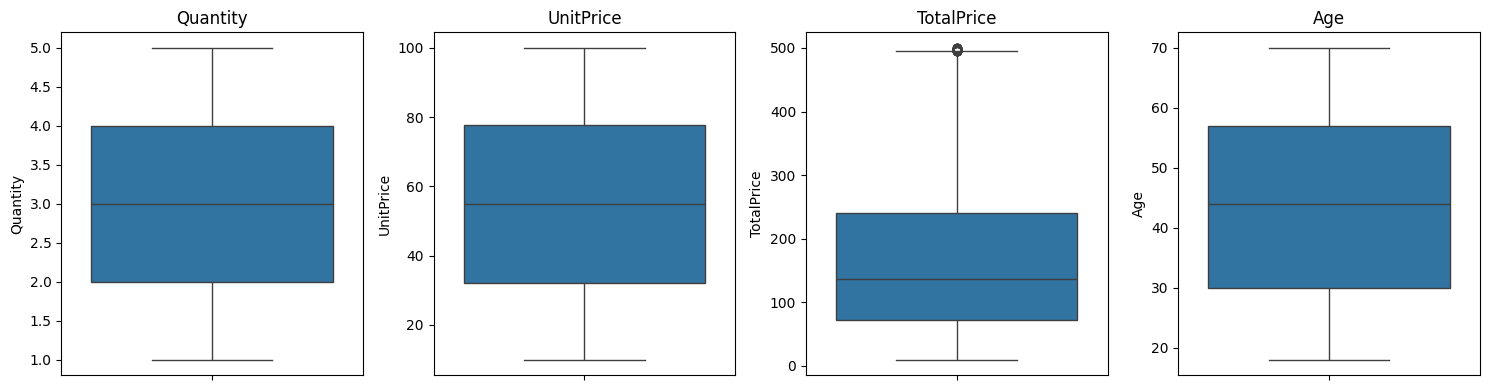

In [14]:
# Cek outlier untuk kolom numerik
numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice', 'Age']

plt.figure(figsize=(15,4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df_clean[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
print(df_clean.isnull().sum())

TransactionID           0
Date                    0
Time                    0
CustomerID              0
Age                     0
Gender                  0
Location                0
StoreID                 0
OnlineOrderFlag         0
ProductID               0
Category                0
Quantity                0
UnitPrice               0
TotalPrice              0
PaymentType             0
PromotionApplied        0
DiscountAmount          0
GiftWrap                0
ShippingMethod          0
DeliveryTime            0
Weather                 0
Event                   0
CustomerSatisfaction    0
ReturnFlag              0
Year                    0
Month                   0
dtype: int64


In [16]:
df_clean.describe().round(2)

,Date,Age,Quantity,UnitPrice,TotalPrice,DiscountAmount,DeliveryTime,CustomerSatisfaction,Year,Month
count,10000,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,2021-05-31 23:03:41.760000256,43.79,3.01,54.96,165.43,6.95,1.63,2.98,2020.50,11.5
min,2018-11-01 00:00:00,18.00,1.00,10.00,10.02,0.00,0.00,1.00,2018.00,11.0
25%,2019-12-02 00:00:00,30.00,2.00,32.05,71.90,0.00,0.00,2.00,2019.00,11.0
50%,2021-11-01 00:00:00,44.00,3.00,55.04,136.29,0.00,1.00,3.00,2021.00,12.0
75%,2022-11-30 00:00:00,57.00,4.00,77.85,241.05,10.41,3.00,4.00,2022.00,12.0
max,2023-12-31 00:00:00,70.00,5.00,100.00,499.98,49.95,5.00,5.00,2023.00,12.0
std,NaN,15.37,1.40,26.24,116.11,11.08,1.83,1.42,1.71,0.5


In [18]:
# Menggunakan dataframe penjualan yang hanya berisi transaksi tanpa pengembalian
df_sales = df_clean[df_clean['ReturnFlag'] == False]

###**GiftWrap Trends and Preferences**

####**Persentase Transaksi dengan Gift Wrap vs Tanpa Gift Wrap**

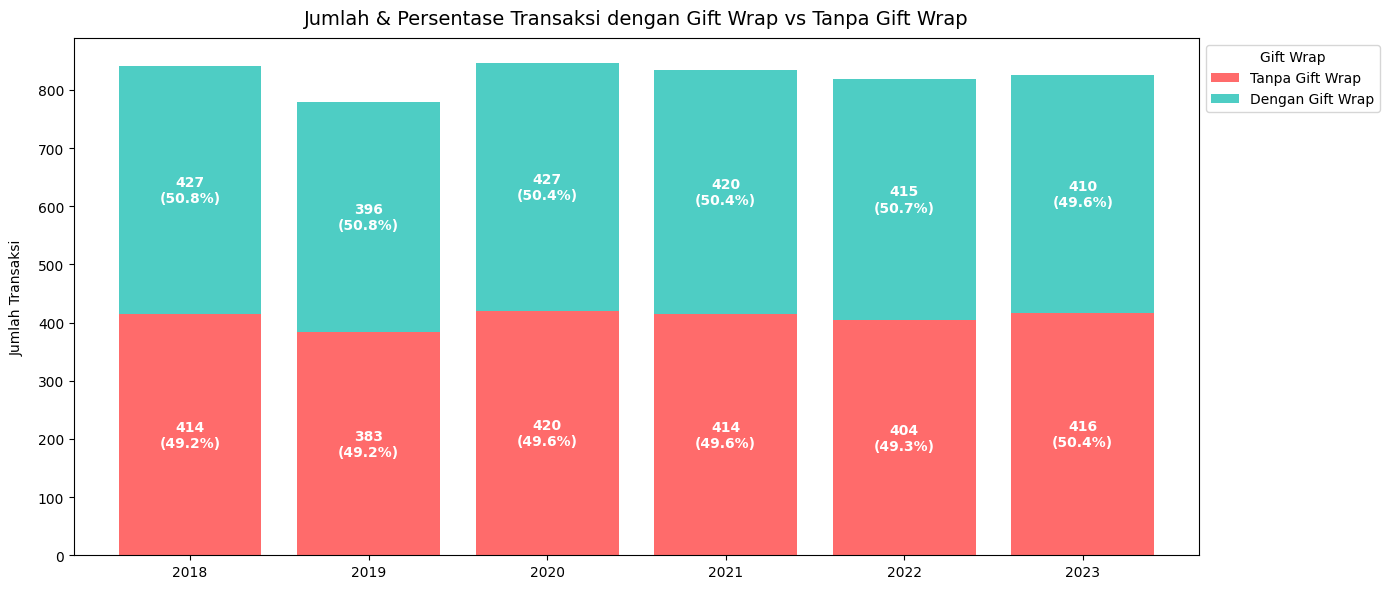

In [141]:
# Hitung transaksi dengan dan tanpa gift wrap per tahun
gift_wrap_data = df_sales.groupby(['Year', 'GiftWrap']).size().unstack(fill_value=0)

# Hitung persentase untuk label
gift_wrap_percentage = gift_wrap_data.div(gift_wrap_data.sum(axis=1), axis=0) * 100

# Buat stacked bar chart
ax = gift_wrap_data.plot(kind='bar',
                         stacked=True,
                         figsize=(14, 6),
                         width=0.8,
                         color=['#FF6B6B', '#4ECDC4'])

# Tambahkan label jumlah & persentase di dalam bar
for i, container in enumerate(ax.containers):
    labels = []
    for j, value in enumerate(container.datavalues):
        percent = gift_wrap_percentage.iloc[j, i]
        labels.append(f"{value:.0f}\n({percent:.1f}%)")

    ax.bar_label(container,
                 labels=labels,
                 label_type='center',
                 fontsize=10,
                 color='white',
                 fontweight='bold')

plt.title('Jumlah & Persentase Transaksi dengan Gift Wrap vs Tanpa Gift Wrap', fontsize=14, pad=10)
plt.xlabel('')
plt.ylabel('Jumlah Transaksi', labelpad=10)
plt.xticks(rotation=0)
plt.legend(['Tanpa Gift Wrap', 'Dengan Gift Wrap'], title='Gift Wrap', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

- Distribusi transaksi relatif seimbang antara gift wrap dan tanpa gift wrap, dengan selisih hanya sekitar 0,4%–1,6% setiap tahunnya.
- Gift wrap cenderung sedikit lebih dominan di sebagian besar tahun (2018, 2019, 2020, 2021, 2022), kecuali tahun 2023 di mana transaksi tanpa gift wrap sedikit lebih tinggi.
- Tren tahunan konsisten stabil – tidak terlihat perubahan signifikan yang menunjukkan adanya pergeseran preferensi yang kuat ke salah satu opsi.

####**Tren Penggunaan Grift Wrap Berdasarkan Channel Penjualan**

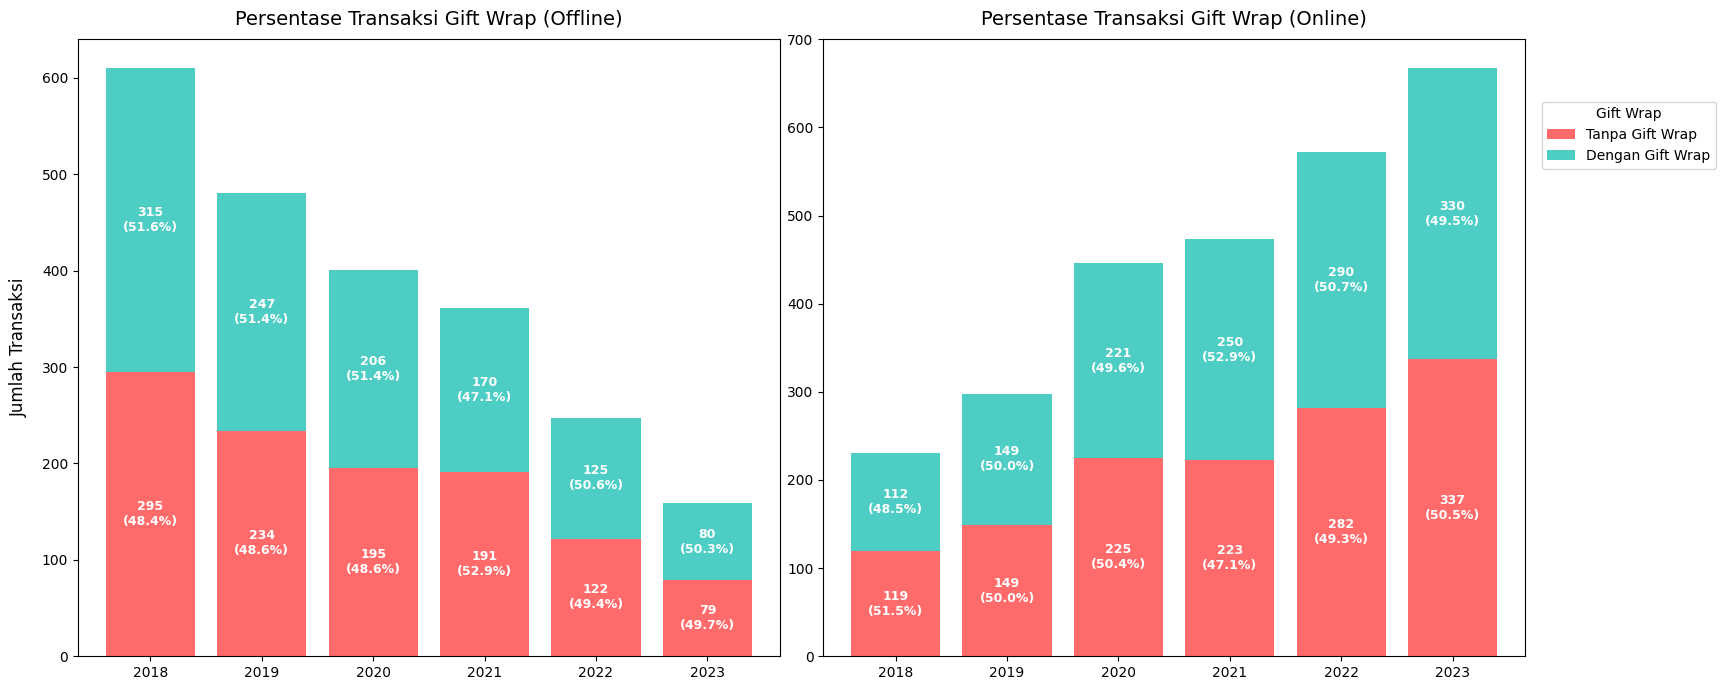

In [142]:
# Hitung transaksi dengan dan tanpa gift wrap per channel dan tahun
gift_wrap_channel_data = df_sales.groupby(['Year', 'OnlineOrderFlag', 'GiftWrap']).size().unstack(fill_value=0).reset_index()

# Pisahkan data Online dan Offline
offline_data = gift_wrap_channel_data[gift_wrap_channel_data['OnlineOrderFlag'] == 0].set_index('Year')
online_data = gift_wrap_channel_data[gift_wrap_channel_data['OnlineOrderFlag'] == 1].set_index('Year')

# Hitung persentase untuk label
offline_percentage = offline_data.iloc[:, 1:].div(offline_data.iloc[:, 1:].sum(axis=1), axis=0) * 100
online_percentage = online_data.iloc[:, 1:].div(online_data.iloc[:, 1:].sum(axis=1), axis=0) * 100

# Buat figure dengan 2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Chart Offline (kiri)
offline_data.iloc[:, 1:].plot(kind='bar',
                             stacked=True,
                             ax=ax1,
                             color=['#FF6B6B', '#4ECDC4'],
                             width=0.8,
                             legend=False)

# Tambahkan label untuk offline
for i, container in enumerate(ax1.containers):
    labels = []
    for j, value in enumerate(container.datavalues):
        if value > 0:
            percent = offline_percentage.iloc[j, i]
            labels.append(f"{value:.0f}\n({percent:.1f}%)")
        else:
            labels.append("")
    ax1.bar_label(container,
                 labels=labels,
                 label_type='center',
                 fontsize=9,
                 color='white',
                 fontweight='bold')

ax1.set_title('Persentase Transaksi Gift Wrap (Offline)', fontsize=14, pad=10)
ax1.set_xlabel('')
ax1.set_ylabel('Jumlah Transaksi', fontsize=12, labelpad=10)
ax1.tick_params(axis='x', rotation=0)

# Chart Online (kanan)
online_data.iloc[:, 1:].plot(kind='bar',
                            stacked=True,
                            ax=ax2,
                            color=['#FF6B6B', '#4ECDC4'],
                            width=0.8,
                            legend=False)

# Tambahkan label untuk online
for i, container in enumerate(ax2.containers):
    labels = []
    for j, value in enumerate(container.datavalues):
        if value > 0:
            percent = online_percentage.iloc[j, i]
            labels.append(f"{value:.0f}\n({percent:.1f}%)")
        else:
            labels.append("")
    ax2.bar_label(container,
                 labels=labels,
                 label_type='center',
                 fontsize=9,
                 color='white',
                 fontweight='bold')

ax2.set_title('Persentase Transaksi Gift Wrap (Online)', fontsize=14, pad=10)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', rotation=0)

fig.legend(['Tanpa Gift Wrap', 'Dengan Gift Wrap'],
          title='Gift Wrap',
          loc='center right',
          bbox_to_anchor=(0.96, 0.8),
          frameon=True)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

- Offline channel menunjukkan penurunan signifikan dalam total transaksi sejak 2018. Baik transaksi dengan maupun tanpa gift wrap menurun drastis setiap tahun.
- Online channel justru mengalami tren pertumbuhan konsisten sejak 2018 hingga 2023, baik untuk gift wrap maupun tanpa gift wrap.
- Persentase gift wrap di kedua kanal relatif seimbang, sering kali berkisar di 48–53%. Tidak ada dominasi absolut, tapi pola pemakaian gift wrap tetap stabil meskipun channel berbeda.

####**Persentase Penggunaan Gift Wrap Pada Momen Khusus**

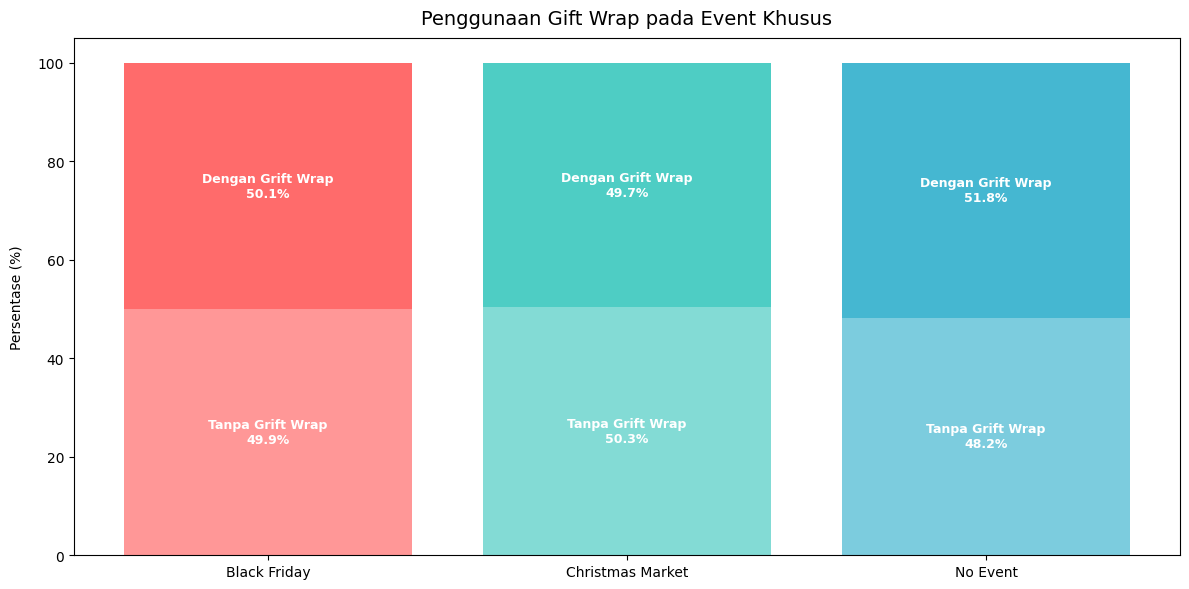

In [143]:
# Hitung transaksi dengan dan tanpa gift wrap per event
event_gift_data = df_sales.groupby(['Event', 'GiftWrap']).size().unstack(fill_value=0)
event_gift_percentage = event_gift_data.div(event_gift_data.sum(axis=1), axis=0) * 100

# Buat warna yang berbeda untuk setiap event
event_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F7A072', '#9EE6CF', '#FFA07A']

# Buat stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, (event, row) in enumerate(event_gift_data.iterrows()):
    total = row.sum()
    percent_no_gift = (row.iloc[0] / total) * 100
    percent_with_gift = (row.iloc[1] / total) * 100

    # Warna untuk event
    color = event_colors[i % len(event_colors)]

    # Plot tanpa gift wrap
    ax.bar(i, percent_no_gift, color=color, alpha=0.7)

    # Plot dengan gift wrap
    ax.bar(i, percent_with_gift, bottom=percent_no_gift, color=color, alpha=1.0)

# Tambahkan label persentase
for i, (event, row) in enumerate(event_gift_data.iterrows()):
    total = row.sum()
    percent_no_gift = (row.iloc[0] / total) * 100
    percent_with_gift = (row.iloc[1] / total) * 100

    # Label untuk tanpa gift wrap
    if row.iloc[0] > 0:
        ax.text(i, percent_no_gift/2, f"Tanpa Grift Wrap\n{percent_no_gift:.1f}%",
                ha='center', va='center', color='white', fontweight='bold', fontsize=9)

    # Label untuk dengan gift wrap
    if row.iloc[1] > 0:
        ax.text(i, percent_no_gift + percent_with_gift/2, f"Dengan Grift Wrap\n{percent_with_gift:.1f}%",
                ha='center', va='center', color='white', fontweight='bold', fontsize=9)

plt.title('Penggunaan Gift Wrap pada Event Khusus', fontsize=14, pad=10)
plt.xlabel('')
plt.ylabel('Persentase (%)', labelpad=10)
plt.xticks(range(len(event_gift_data)), event_gift_data.index, rotation=0, ha='center')
plt.ylim(0, 105)
ax.legend_.remove() if ax.legend_ else None
plt.tight_layout()
plt.show()

- Perbedaan persentase penggunaan gift wrap antar event sangat tipis (hanya 1–3%).
- Secara keseluruhan, baik pada event besar maupun tanpa event, proporsi gift wrap tetap seimbang.
- Tidak ada event khusus yang menunjukkan lonjakan signifikan penggunaan gift wrap.
- Pada Black Friday penggunaan gift wrap sedikit lebih tinggi yaitu 50,1%, menunjukkan bahwa meskipun fokus belanja ada pada diskon besar, pelanggan tetap mempertimbangkan gift wrap.
- Pada Christmas Market proporsi gift wrap justru lebih rendah yaitu 49,7%, meskipun event ini identik dengan hadiah. Hal ini bisa menandakan bahwa pelanggan lebih memilih produk langsung tanpa tambahan gift wrap.
- Pada kondisi tanpa event proporsi gift wrap justru paling tinggi yaitu 51,8%, menandakan bahwa dalam situasi normal pelanggan lebih cenderung menggunakan gift wrap dibanding saat event besar.

####**Persentase Penggunaan Gift Wrap Saat Ada Promo Atau Diskon**

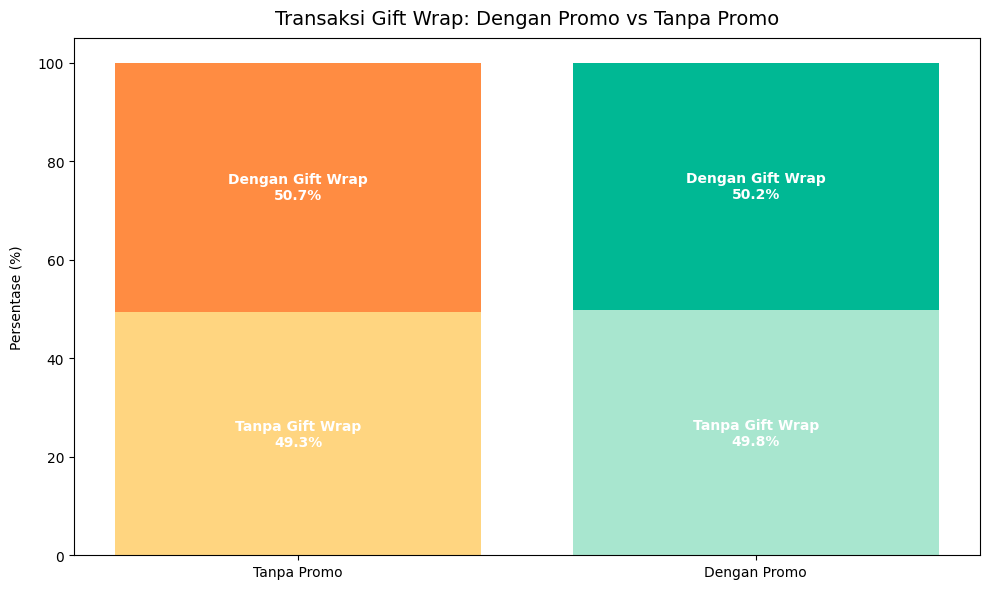

In [144]:
# Hitung transaksi dengan/ tanpa gift wrap per status promo
promo_gift_data = df_sales.groupby(['PromotionApplied', 'GiftWrap']).size().unstack(fill_value=0)
promo_gift_percentage = promo_gift_data.div(promo_gift_data.sum(axis=1), axis=0) * 100

# Warna: sama tone untuk gift wrap, beda antar promo
colors = [
    ['#FFD580', '#FF8C42'],   # Tanpa Promo
    ['#A8E6CF', '#00B894']]   # Dengan Promo

# Buat stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (idx, row) in enumerate(promo_gift_percentage.iterrows()):
    # Tanpa Gift Wrap
    ax.bar(i, row.iloc[0], color=colors[i][0])
    # Dengan Gift Wrap
    ax.bar(i, row.iloc[1], bottom=row.iloc[0], color=colors[i][1])

    # Label Tanpa Gift Wrap
    if row.iloc[0] > 0:
        ax.text(i, row.iloc[0]/2,
                f"Tanpa Gift Wrap\n{row.iloc[0]:.1f}%",
                ha='center', va='center', color='white',
                fontweight='bold', fontsize=10, linespacing=1.2)

    # Label Dengan Gift Wrap
    if row.iloc[1] > 0:
        ax.text(i, row.iloc[0] + row.iloc[1]/2,
                f"Dengan Gift Wrap\n{row.iloc[1]:.1f}%",
                ha='center', va='center', color='white',
                fontweight='bold', fontsize=10, linespacing=1.2)

plt.title('Transaksi Gift Wrap: Dengan Promo vs Tanpa Promo', fontsize=14, pad=10)
plt.ylabel('Persentase (%)', labelpad=10)
plt.xticks([0, 1], ['Tanpa Promo', 'Dengan Promo'], rotation=0)
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

- Perbedaan persentase penggunaan gift wrap antara kondisi dengan promo dan tanpa promo sangat tipis, hanya sekitar 0,5%.
- Secara umum baik ada promo maupun tidak, proporsi gift wrap tetap seimbang dengan transaksi tanpa gift wrap.
- Hal ini menunjukkan bahwa keberadaan promo tidak terlalu memengaruhi keputusan pelanggan dalam menggunakan gift wrap.

###**GiftWrap User Demographics and Product Category**

####**Segmen Usia dan Gender Pengguna Gift Wrap**

In [98]:
# Segmentasi usia
bins = [0, 12, 19, 35, 55, 100]
labels = ['Anak-anak (<12)', 'Remaja (13-19)', 'Dewasa Muda (20-35)',
          'Paruh Baya (36-55)', 'Lansia (>56)']
df_sales.loc[:, 'AgeSegment'] = pd.cut(df_sales['Age'], bins=bins, labels=labels, right=False)

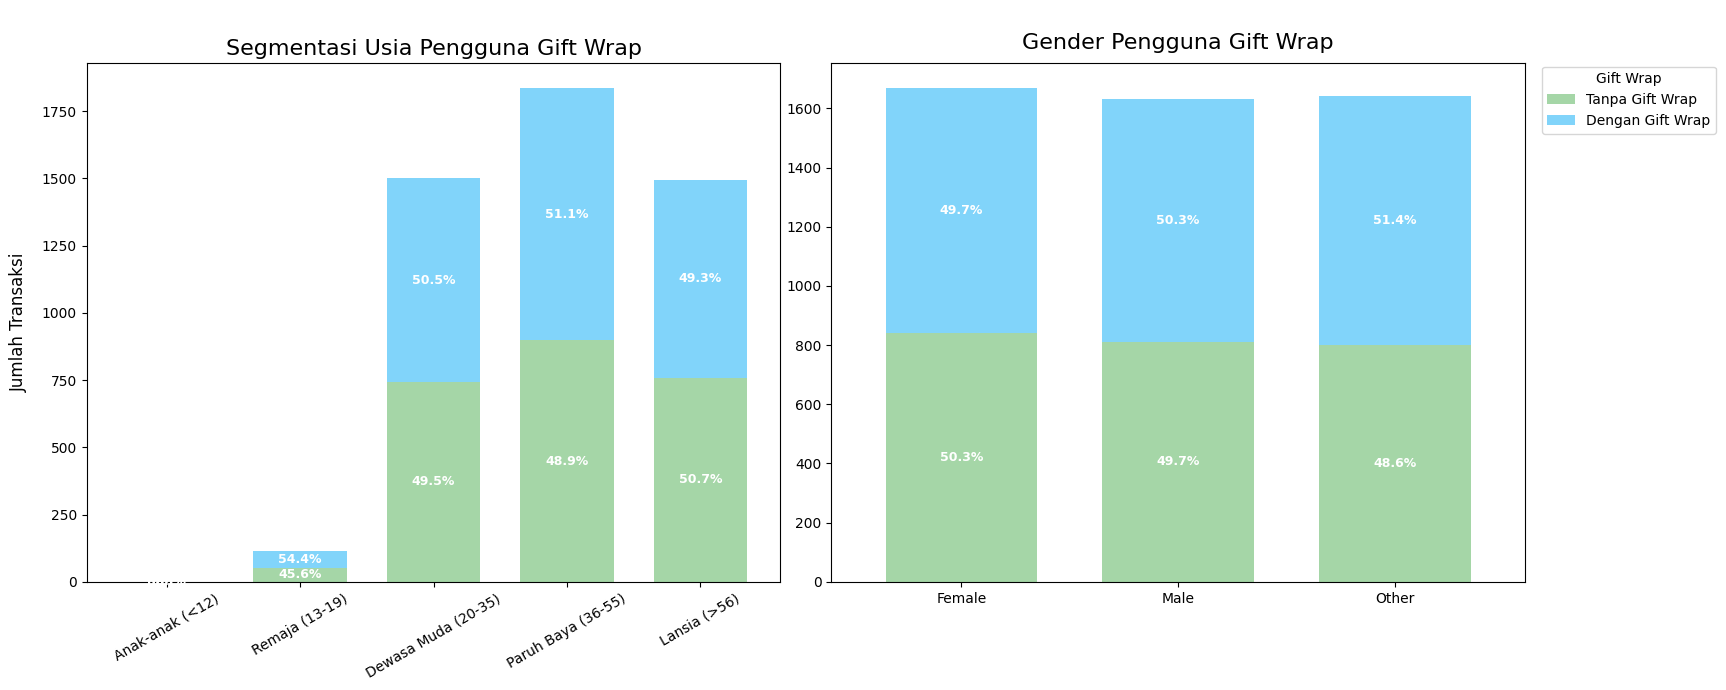

In [118]:
# Hitung data untuk segmentasi usia
age_gift_data = df_sales.groupby(['AgeSegment', 'GiftWrap'], observed=False).size().unstack(fill_value=0)
age_gift_percentage = age_gift_data.div(age_gift_data.sum(axis=1), axis=0) * 100

# Hitung data untuk gender
gender_gift_data = df_sales.groupby(['Gender', 'GiftWrap']).size().unstack(fill_value=0)
gender_gift_percentage = gender_gift_data.div(gender_gift_data.sum(axis=1), axis=0) * 100

# Warna Bar
colors = ['#A5D6A7', '#81D4FA']

# Buat figure dengan 2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Chart Segmentasi Usia (kiri)
age_gift_data.plot(kind='bar', stacked=True, ax=ax1, color=colors, width=0.7)

# Tambahkan label persentase untuk usia
for i, container in enumerate(ax1.containers):
    labels = []
    for j, value in enumerate(container.datavalues):
        percent = age_gift_percentage.iloc[j, i]
        if i == 0:
            labels.append(f"{percent:.1f}%")
        else:
            labels.append(f"{percent:.1f}%")
    ax1.bar_label(container,
                  labels=labels,
                  label_type='center',
                  fontsize=9,
                  color='white',
                  fontweight='bold')

ax1.set_title('\nSegmentasi Usia Pengguna Gift Wrap', fontsize=16)
ax1.set_xlabel('')
ax1.set_ylabel('Jumlah Transaksi', fontsize=12, labelpad=10)
ax1.tick_params(axis='x', rotation=30)

# Chart Gender (kanan)
gender_gift_data.plot(kind='bar', stacked=True, ax=ax2, color=colors, width=0.7)

# Tambahkan label persentase untuk gender
for i, container in enumerate(ax2.containers):
    labels = []
    for j, value in enumerate(container.datavalues):
        percent = gender_gift_percentage.iloc[j, i]
        if i == 0:
            labels.append(f"{percent:.1f}%")
        else:
            labels.append(f"{percent:.1f}%")
    ax2.bar_label(container,
                  labels=labels,
                  label_type='center',
                  fontsize=9,
                  color='white',
                  fontweight='bold')

ax2.set_title('\nGender Pengguna Gift Wrap', fontsize=16, pad=10)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', rotation=0)

# Tambahkan legenda tunggal di kanan
ax1.legend_.remove()
ax2.legend_.remove()
fig.legend(['Tanpa Gift Wrap', 'Dengan Gift Wrap'],
           title='Gift Wrap',
           loc='center right',
           bbox_to_anchor=(0.96, 0.85),
           frameon=True)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

- Penggunaan gift wrap relatif seimbang di seluruh segmen usia maupun gender, dengan selisih hanya 1–2%.
- Tidak ada dominasi mutlak pada kelompok tertentu, menunjukkan bahwa gift wrap digunakan secara luas oleh berbagai demografi.

####**Tingkat Penggunaan Gift Wrap Berdasarkan Lokasi Pelanggan**

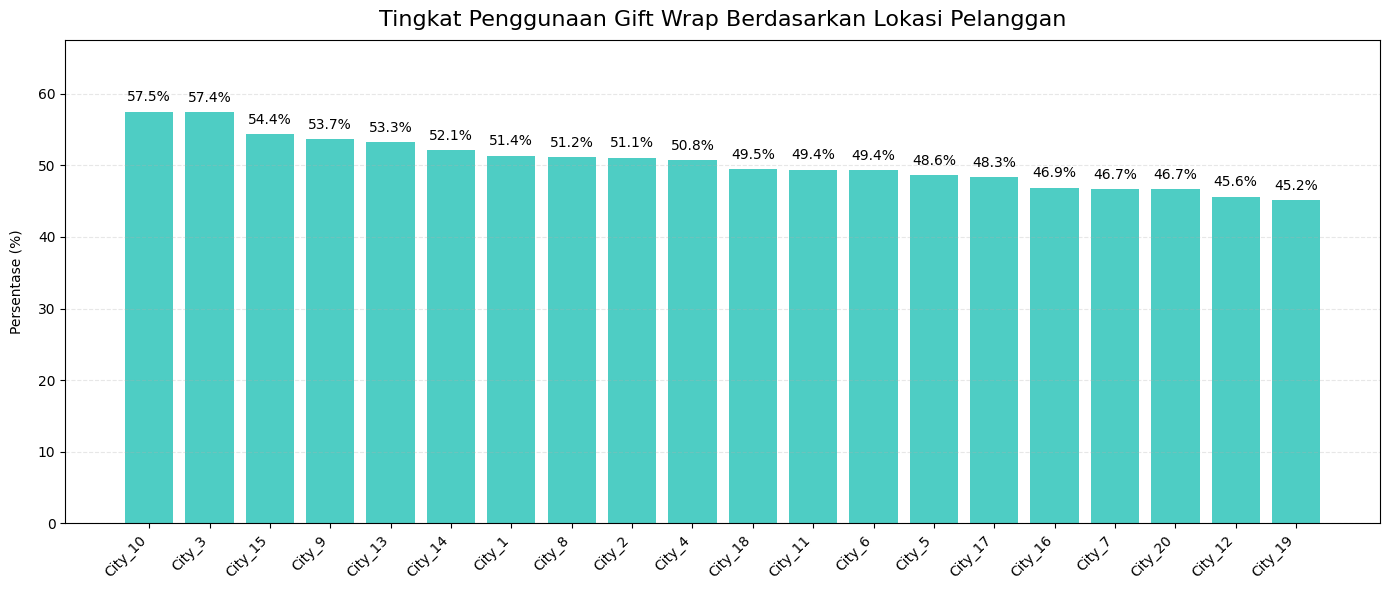

In [145]:
# Hitung persentase penggunaan gift wrap per lokasi
location_gift_data = df_sales.groupby(['Location', 'GiftWrap']).size().unstack(fill_value=0)
location_gift_percentage = location_gift_data.div(location_gift_data.sum(axis=1), axis=0) * 100

# Ambil kolom untuk "Dengan Gift Wrap"
gift_wrap_column = location_gift_data.columns[1]
with_gift_percentage = location_gift_percentage[gift_wrap_column]
with_gift_percentage_sorted = with_gift_percentage.sort_values(ascending=False)

# Buat bar chart
plt.figure(figsize=(14, 6))
bars = plt.bar(range(len(with_gift_percentage_sorted)),
               with_gift_percentage_sorted.values,
               color='#4ECDC4')

# Tambahkan label persentase
for i, (location, percentage) in enumerate(with_gift_percentage_sorted.items()):
    plt.text(i, percentage + 1, f'{percentage:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.title('Tingkat Penggunaan Gift Wrap Berdasarkan Lokasi Pelanggan', fontsize=16, pad=10)
plt.xlabel('')
plt.ylabel('Persentase (%)', labelpad=10)
plt.xticks(range(len(with_gift_percentage_sorted)), with_gift_percentage_sorted.index, rotation=45, ha='right')
plt.ylim(0, with_gift_percentage_sorted.max() + 10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

- Tingkat penggunaan gift wrap antar kota bervariasi cukup lebar, dari 45-58 %.
- Ada kota tertentu yang menunjukkan preferensi lebih tinggi terhadap gift wrap dibanding kota lain.
- Kota dengan tingkat penggunaan gift wrap tertinggi adalah City_10 (57,5 %) dan City_3 (57,4 %).
- Kota dengan tingkat penggunaan terendah adalah City_19 (45,2 %) dan City_12 (45,6 %).
- Sebagian besar kota memiliki tingkat penggunaan gift wrap di kisaran 49–52 %, menunjukkan pola relatif seimbang.

####**Tingkat Penggunaan Gift Wrap Berdasarkan Store ID**

/tmp/ipython-input-3934285707.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_store = df_sales[df_clean['StoreID'] != 'Online']


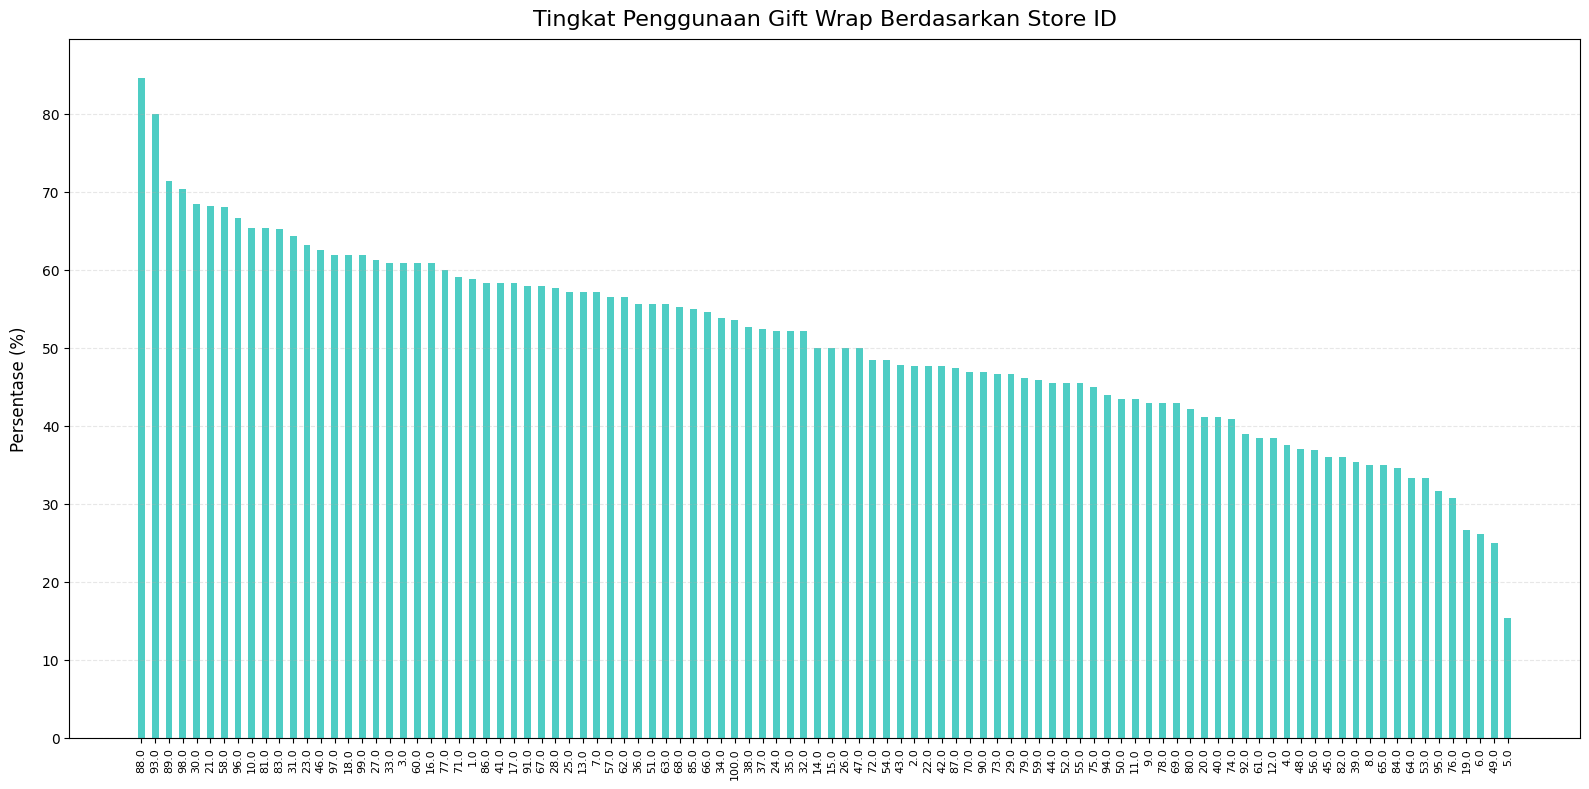

In [146]:
# Filter data untuk mengecualikan StoreID "Online"
df_store = df_sales[df_clean['StoreID'] != 'Online']

# Hitung persentase penggunaan gift wrap per StoreID
StoreID_gift_data = df_store.groupby(['StoreID', 'GiftWrap']).size().unstack(fill_value=0)
StoreID_gift_percentage = StoreID_gift_data.div(StoreID_gift_data.sum(axis=1), axis=0) * 100

# Ambil kolom untuk "Dengan Gift Wrap"
gift_wrap_column = StoreID_gift_data.columns[1]
with_gift_percentage = StoreID_gift_percentage[gift_wrap_column]
with_gift_percentage_sorted = with_gift_percentage.sort_values(ascending=False)

# Buat bar chart
plt.figure(figsize=(16, 8))
bars = plt.bar(range(len(with_gift_percentage_sorted)),
               with_gift_percentage_sorted.values,
               color='#4ECDC4',
               width=0.5)

plt.title('Tingkat Penggunaan Gift Wrap Berdasarkan Store ID', fontsize=16, pad=10)
plt.xlabel('')
plt.ylabel('Persentase (%)', fontsize=12, labelpad=10)
plt.xticks(range(len(with_gift_percentage_sorted)), with_gift_percentage_sorted.index, rotation=90, ha='center', fontsize=8)
plt.ylim(0, with_gift_percentage_sorted.max()+5)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.subplots_adjust(bottom=0.3)
plt.tight_layout()
plt.show()

- Tingkat penggunaan gift wrap antar toko sangat bervariasi, dari sekitar 15-85%.
- Perbedaan ini menunjukkan bahwa preferensi pelanggan bisa sangat dipengaruhi oleh faktor lokal tiap store, seperti demografi pelanggan, cara promosi, atau budaya belanja di wilayah tersebut.
- Ada beberapa store dengan tingkat penggunaan sangat tinggi (> 70%), artinya gift wrap sudah menjadi layanan populer dan bisa diposisikan sebagai nilai tambah.
- Sebaliknya, ada store dengan tingkat penggunaan sangat rendah (< 30%), menunjukkan potensi besar untuk dilakukan edukasi atau promosi agar layanan ini lebih menarik.
- Sebagian besar store berada di kisaran 40–60%, menunjukkan pola penggunaan menengah yang relatif stabil.

####**Persentase Penggunaan Gift Wrap Berdasarkan Kategori Produk**

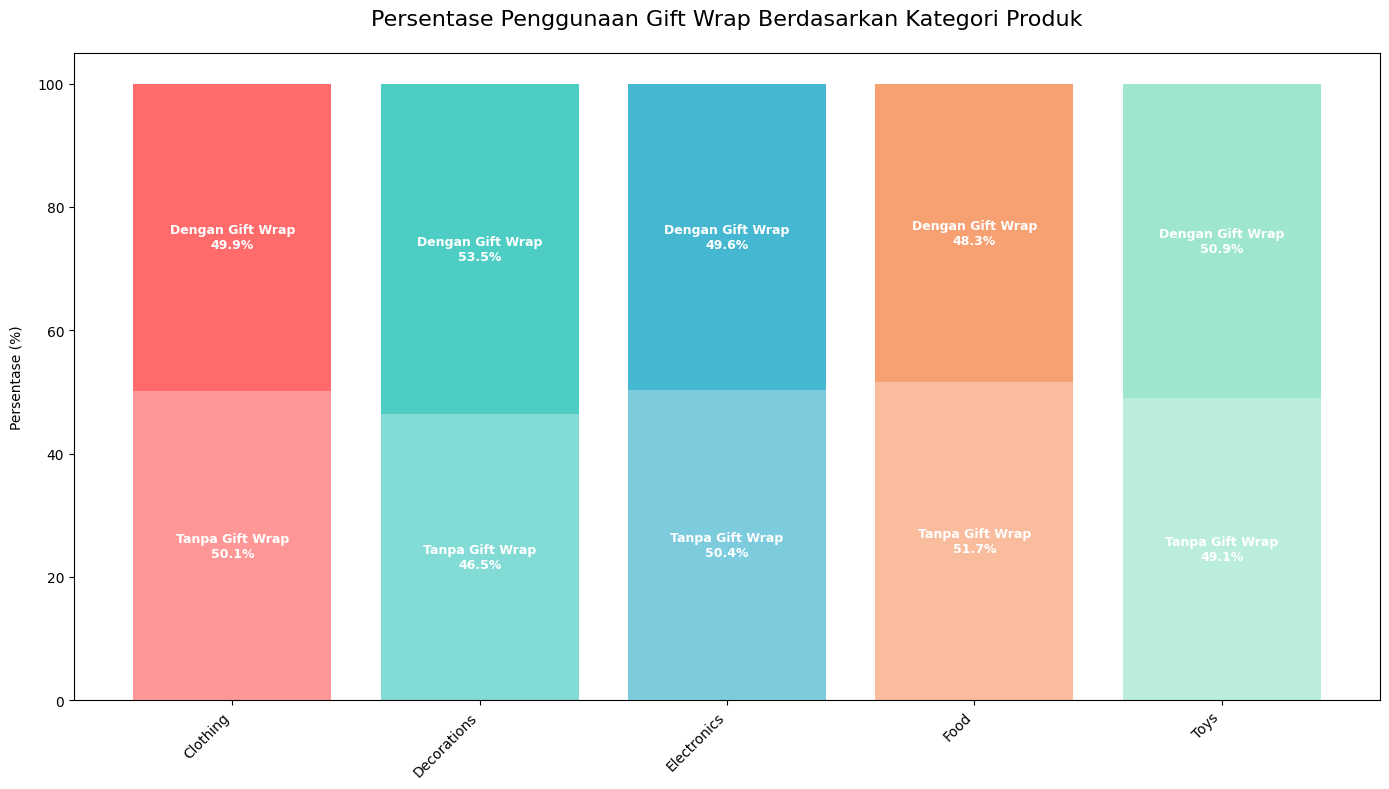

In [147]:
# Hitung transaksi dengan/ tanpa gift wrap per kategori produk
category_gift_data = df_sales.groupby(['Category', 'GiftWrap']).size().unstack(fill_value=0)
category_gift_percentage = category_gift_data.div(category_gift_data.sum(axis=1), axis=0) * 100

# Buat warna yang berbeda untuk setiap kategori
category_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F7A072', '#9EE6CF',
                   '#FFA07A', '#98D8E8', '#C5A3FF', '#FF9AA2', '#B5EAD7']

# Buat stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

for i, (category, row) in enumerate(category_gift_percentage.iterrows()):
    # Warna untuk kategori ini
    color = category_colors[i % len(category_colors)]

    # Tanpa Gift Wrap
    ax.bar(i, row.iloc[0], color=color, alpha=0.7)
    # Dengan Gift Wrap
    ax.bar(i, row.iloc[1], bottom=row.iloc[0], color=color, alpha=1.0)

    # Label Tanpa Gift Wrap
    if row.iloc[0] > 0:
        ax.text(i, row.iloc[0]/2,
                f"Tanpa Gift Wrap\n{row.iloc[0]:.1f}%",
                ha='center', va='center', color='white',
                fontweight='bold', fontsize=9, linespacing=1.2)

    # Label Dengan Gift Wrap
    if row.iloc[1] > 0:
        ax.text(i, row.iloc[0] + row.iloc[1]/2,
                f"Dengan Gift Wrap\n{row.iloc[1]:.1f}%",
                ha='center', va='center', color='white',
                fontweight='bold', fontsize=9, linespacing=1.2)

plt.title('Persentase Penggunaan Gift Wrap Berdasarkan Kategori Produk', fontsize=16, pad=20)
plt.ylabel('Persentase (%)', labelpad=10)
plt.xlabel('')
plt.xticks(range(len(category_gift_percentage)), category_gift_percentage.index, rotation=45, ha='right')
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

- Proporsi penggunaan gift wrap antar kategori produk relatif mirip, berada pada rentang sekitar 48% hingga 54%.
- Secara umum, tidak terlihat adanya perbedaan signifikan antar kategori, menandakan bahwa hampir separuh pelanggan di semua kategori sama-sama memanfaatkan layanan gift wrap.
- Jarak antara kategori dengan penggunaan tertinggi dan terendah hanya sekitar 5%, sehingga dapat disimpulkan bahwa jenis produk tidak terlalu memengaruhi keputusan dalam menggunakan grift wrap.

### **Kesimpulan**

Berdasarkan hasil analisis, penggunaan gift wrap menunjukkan pola yang stabil dan konsisten dari tahun ke tahun, tanpa adanya pergeseran preferensi yang signifikan antara transaksi dengan maupun tanpa gift wrap. Meskipun terjadi perbedaan kecil pada momen khusus atau saat adanya promo, persentase penggunaan gift wrap tetap relatif seimbang, sehingga faktor eksternal seperti event dan diskon tidak menjadi pendorong utama keputusan pelanggan.

Dari sisi demografi, gift wrap digunakan secara merata di semua segmen usia dan gender, menegaskan bahwa layanan ini memiliki daya tarik universal. Namun, variasi cukup besar terlihat pada tingkat penggunaan antar kota dan antar store, di mana beberapa lokasi menunjukkan preferensi sangat tinggi sementara lainnya masih rendah, sehingga membuka peluang untuk strategi promosi yang lebih terarah. Sementara itu, kategori produk tidak menunjukkan perbedaan berarti, menandakan bahwa gift wrap dimanfaatkan secara konsisten di hampir semua jenis produk.

Saran pengembangan ke depan:

- Fokuskan promosi atau edukasi layanan gift wrap di kota maupun store dengan tingkat penggunaan rendah (< 40%), misalnya melalui penawaran bundling atau komunikasi nilai tambah gift wrap.
- Penguatan channel online. Karena transaksi online terus bertumbuh, layanan gift wrap dapat diposisikan sebagai opsi default atau ditawarkan dengan personalisasi (misalnya rekomendasi gift wrap saat checkout).
- Analisis lanjutan dengan menggali pola preferensi mikro (misalnya pelanggan baru vs pelanggan lama) untuk strategi pemasaran yang lebih tepat sasaran.
- Eksperimen desain dan opsi gift wrap. Mengingat kategori produk tidak terlalu memengaruhi keputusan, diferensiasi dapat ditingkatkan melalui variasi desain gift wrap yang sesuai musim, tema lokal, atau preferensi pelanggan.
- Integrasi dengan program loyalitas, menjadikan gift wrap sebagai salah satu benefit tambahan bagi pelanggan setia, sehingga bisa meningkatkan engagement sekaligus mendorong penggunaan lebih luas.